In [151]:
from scipy.io import loadmat
import numpy as np
import pandas as pd

from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [3]:
mat_data = loadmat("/Users/sean/code/wormAnalysis/data/cata_time_series/120827_HD233_WT_2doF_5mMTB_ALLplts/120827_HD233_WT_2do_plt1/1_PreLev/SEAN_DATA/SEAN_120827_HD233_WT_2doF_5mM_plt1_01.mat")

In [98]:
ys = mat_data['i410'].transpose()

x = np.arange(1,np.shape(ys)[1])
xs = np.tile(x, (np.shape(ys)[0],1))
alpha = np.repeat(0.05, np.shape(ys)[0])

p = figure(plot_width=800, plot_height=450)
p.multi_line(xs.tolist(), ys.tolist(), alpha=alpha)
show(p)

In [103]:
strain_indexer = pd.read_csv("/Users/sean/code/wormAnalysis/data/cata_time_series/120827_HD233_WT_2doF_5mMTB_ALLplts/120827_HD233_WT_2do_plt1/0_Stacks 120827_HD233_WT_2do_plt1/indexer_120827_HD233_WT_2doF_5mM_plt1_01.csv")

In [112]:
strain_indexer

Strain  Start_Animal  End_Animal
0    Animal 1             1         121
1    Animal 2           122         242
2    Animal 3           243         363
3    Animal 4           364         484
4    Animal 5           485         548
5    Animal 6           549         605
6    Animal 7           606         610
7    Animal 8           611         726
8    Animal 9           727         847
9   Animal 10           848         968
10  Animal 11           969        1089
11  Animal 12          1090        1210
12  Animal 13          1211        1331
13  Animal 14          1332        1452
14  Animal 15          1453        1573
15  Animal 16          1574        1694
16  Animal 17          1695        1815
17  Animal 18          1816        1936

In [117]:
[np.arange(x[0], x[1]) for x in zip(strain_indexer['Start_Animal'], strain_indexer['End_Animal'])]

[array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120]),
 array([122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
        135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
        148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
        161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
        174, 175, 176, 177

In [136]:
strains = np.concatenate(
    [np.repeat(x[0], x[2] - x[1] + 1) 
     for x in zip(strain_indexer['Strain'], strain_indexer['Start_Animal'], strain_indexer['End_Animal'])])

In [159]:
i410_wide = pd.DataFrame(mat_data['i410'].transpose())
i410_wide['Strain'] = strains
i410_wide

0            1            2            3            4  \
0     532.483336   665.559237   844.130430  1040.410117  1257.130462   
1     540.673683   972.320968  1862.406191  2813.491036  3729.953017   
2     405.016017   735.933708  1629.978158  2602.686701  3563.979251   
3     435.677675   749.282754  1434.523571  2212.513576  3059.199935   
4     426.488630   704.345933  1337.536513  2069.446477  2879.684039   
5     498.139336   943.561296  1485.320353  2334.878611  3151.184931   
6     465.137031   768.205259  1382.490780  2122.914093  2962.330642   
7     480.926619   769.966365  1369.647368  2098.607522  2968.940786   
8     537.501094   962.421373  1522.230355  2284.686195  3062.199446   
9     459.750306   754.843448  1280.958455  2039.661578  2807.887538   
10    487.997834   750.451266  1259.077827  1891.081125  2631.766236   
11    421.686794   680.166651  1170.289241  1864.634019  2654.681325   
12    451.700251   675.772025  1151.818361  1729.449734  2457.482787   
13    535.157857   837.688933  1370.063515  2014.374610  2767.679391   
14    542.155049   842.107333  1385.830025  2028.513526  2746.517095   
15    436.187656   687.322294  1142.989303  1809.197877  2553.209718   
16    442.949204   698.480165  1199.007106  1858.964866  2597.202453   
17    414.790369   693.730837  1398.917631  2245.832088  3230.792257   
18    494.824510   972.611339  1644.216369  2543.615943  3449.507170   
19    514.054807  1021.942028  1794.688633  2802.930488  3612.800337   
20    458.249470   893.825653  1530.975160  2514.455812  3521.359883   
21    472.191382   916.312909  1624.608849  2525.198937  3465.250971   
22    442.153116   821.198520  1401.184968  2307.444869  3289.000379   
23    398.025153   819.941399  1430.607957  2355.254864  3303.729924   
24    382.562501   725.846206  1271.583719  2247.168507  3305.756453   
25    416.005872   807.565687  1539.458108  2712.219328  3647.547550   
26    447.166352   837.998491  1556.234016  2698.295781  3612.080227   
27    384.061245   722.607669  1296.834409  2167.746907  3138.957192   
28    431.484855   846.628049  1545.385113  2707.500010  3639.078304   
29    442.741396   883.241102  1697.187551  2995.094445  3845.467710   
...          ...          ...          ...          ...          ...   
1906  553.139143  1160.902233  1904.665829  2803.289942  3466.551318   
1907  537.605589  1002.472647  1646.963546  2442.601893  3212.094508   
1908  618.138882  1126.964125  1783.182873  2519.321289  3158.910824   
1909  589.826692  1103.242444  1701.918114  2459.207277  3184.966966   
1910  622.579026  1086.798098  1680.016359  2365.791421  3036.684785   
1911  495.922241   941.033159  1483.856615  2217.141388  2931.821479   
1912  556.208887   986.608196  1559.453512  2243.811650  2931.331040   
1913  522.242379   945.236360  1519.653303  2224.410532  2957.427719   
1914  430.605797   940.368718  1700.957268  2740.772254  3688.334876   
1915  382.952177   916.816383  1706.922887  2720.059167  3644.931188   
1916  508.768359  1067.016075  1872.029534  2878.003818  3795.431861   
1917  380.789768   862.116757  1603.375703  2620.707492  3605.765723   
1918  409.566763   899.419434  1625.288755  2590.650788  3492.542937   
1919  400.148319   896.478914  1603.362980  2594.112949  3501.271895   
1920  389.258631   845.154559  1496.351463  2440.082193  3323.357452   
1921  432.036635   900.259817  1592.384896  2537.424799  3438.642957   
1922  541.597391  1104.408141  1851.427889  2804.836181  3512.675377   
1923  452.196201   945.168313  1666.718933  2603.546125  3494.879869   
1924  415.578106   859.022503  1524.965742  2472.582512  3401.809910   
1925  457.671950   927.768558  1631.136408  2602.120308  3534.596958   
1926  472.582499   957.884616  1667.841071  2618.866219  3523.302851   
1927  388.702881   847.119665  1530.665099  2502.258820  3438.898398   
1928  460.679766   931.197201  1615.033293  2552.755447  3461.260848   
1929  406.513349   858.789119  1530.076448  2451.755979

In [144]:
long_i410 = pd.DataFrame(mat_data['i410'].transpose()).melt(var_name='x',value_name='i410')

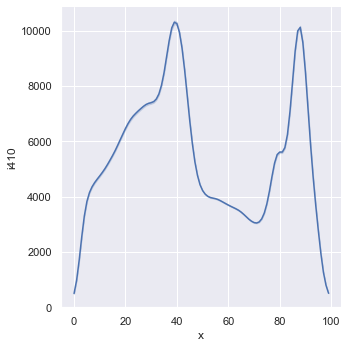

In [148]:
f = sns.relplot(x='x',  y='i410', kind='line', data=long_i410)

In [154]:
import bokeh
bokeh.to_bokeh(f)

AttributeError: module 'bokeh' has no attribute 'to_bokeh'